In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from psycopg2 import sql
import psycopg2
import os
import matplotlib.pyplot as plt

## Sales

In [12]:
from sqlalchemy import create_engine
from data_utils import load_data, load_data_current_batches, preprocess_data

sales_data, price_data, competitor_data = load_data(from_date="2024-04-10")
df = preprocess_data(sales_data, price_data, competitor_data)

In [41]:
activate_batches = sales_data.loc[lambda df: df.sell_by > pd.Timestamp.now()]['batch_name'].unique()

In [35]:
df.loc[lambda df: df.timestamp == df.timestamp.max()][['dynamicdealmakers', 'gendp', 'redalert', 'random_competitor']].mean()

dynamicdealmakers    6.655000
gendp                3.847545
redalert             6.797075
random_competitor    2.971818
dtype: float64

In [44]:
comp_df = df.loc[lambda df: df.timestamp == df.timestamp.max()][['dynamicdealmakers', 'gendp', 'redalert', 'random_competitor']]
highest_seller = comp_df.mean().index[comp_df.mean().argmax()]


In [9]:
df

,batch_id,batch_name,timestamp,product,sell_by,stock,product_name,price,start_date,execution_time,dynamicdealmakers,gendp,redalert,thepriceisright,random_competitor,stock_diff,sales,hours_until_perished
0,34260,rice_bf95ccca-51d8-48e6-8194-720813d86b82,2024-04-14 08:54:20.648847,rice,2024-04-15 08:54:01.215213,50,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005278
1,34261,wine_a19d0152-9aba-4fca-810f-94719a6c9b07,2024-04-14 08:54:20.648847,wine,2024-04-15 08:54:01.215223,20,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005278
2,34260,rice_bf95ccca-51d8-48e6-8194-720813d86b82,2024-04-14 09:01:26.343382,rice,2024-04-15 08:54:01.215213,50,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,-0.0,NaN,0.123611
3,34261,wine_a19d0152-9aba-4fca-810f-94719a6c9b07,2024-04-14 09:01:26.343382,wine,2024-04-15 08:54:01.215223,20,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,-0.0,NaN,0.123611
4,34260,rice_bf95ccca-51d8-48e6-8194-720813d86b82,2024-04-14 09:06:23.083822,rice,2024-04-15 08:54:01.215213,50,5,5.0000,2024-04-14 09:03:24.637387,NaT,NaN,NaN,NaN,NaN,NaN,-0.0,-0.0,0.205833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16175,35341,broccoli_4cbccb04-1c1f-4cba-a302-5d4d6cfa1f70,2024-04-15 08:30:25.549012,broccoli,2024-04-15 08:48:00.505662,100,5,3.1185,2024-04-15 08:27:20.325372,2024-04-15 08:28:03.007615,43.00,NaN,3.15,NaN,3.36,-0.0,-0.0,23.706944
16176,35347,apples-red_81adbcc4-b6ed-4489-9464-8760b47f6a9d,2024-04-15 08:30:25.549012,apples-red,2024-04-15 08:58:01.119422,150,5,2.3859,2024-04-15 08:27:20.325372,2024-04-15 08:28:03.007615,25.00,NaN,2.41,NaN,4.24,-0.0,-0.0,23.540000
16177,34868,rice_552ecd71-da7e-4df2-a88c-ecd7cb9d95b0,2024-04-15 08:30:25.549012,rice,2024-04-15 21:40:01.084325,50,5,59.0040,2024-04-15 08:27:20.325372,2024-04-15 08:28:03.007615,1.52,NaN,59.60,NaN,4.18,-0.0,-0.0,10.840000
16178,35355,apples-red_e1ef0c50-af45-48ad-808e-9c92b1c22d3b,2024-04-15 08:30:25.549012,apples-red,2024-04-15 09:10:00.549614,150,5,0.0198,2024-04-15 08:27:20.325372,2024-04-15 08:28:03.007615,25.00,NaN,0.02,NaN,2.61,-0.0,-0.0,23.340000


In [18]:
sales_data.loc[lambda df: df.timestamp == df.timestamp.max()]

,batch_id,batch_name,timestamp,product,sell_by,stock
272109,34260,rice_bf95ccca-51d8-48e6-8194-720813d86b82,2024-04-15 08:49:20.652100,rice,2024-04-15 08:54:01.215213,50
272273,34261,wine_a19d0152-9aba-4fca-810f-94719a6c9b07,2024-04-15 08:49:20.652100,wine,2024-04-15 08:54:01.215223,20
272672,34278,rice_9fac8c75-ca50-4157-9aaf-37c90cf61eb9,2024-04-15 08:49:20.652100,rice,2024-04-15 09:16:01.097003,50
272994,34279,wine_a346d118-1f7f-4553-a703-a372ffc10606,2024-04-15 08:49:20.652100,wine,2024-04-15 09:16:01.097012,20
273420,34296,rice_8e7fb0f6-59ee-4d30-84c9-51b40b6f4ccf,2024-04-15 08:49:20.652100,rice,2024-04-15 09:38:01.061692,50
...,...,...,...,...,...,...
297534,35386,bananas-organic_b953faa7-4b2c-4d00-8ca7-1b367a...,2024-04-15 08:49:20.652100,bananas-organic,2024-04-15 09:42:01.172954,50
297535,35387,broccoli_e1fc950e-ad93-4b40-b083-6db682670ec2,2024-04-15 08:49:20.652100,broccoli,2024-04-15 09:42:01.172963,100
297538,35388,cheese_09497bae-3e97-4f5b-bb34-5feafb0aa12c,2024-04-15 08:49:20.652100,cheese,2024-04-15 09:42:01.172973,30
297539,35389,avocado_9f56b089-34b8-42de-a6b6-0be8b9b64752,2024-04-15 08:49:20.652100,avocado,2024-04-15 09:12:01.172981,20


In [23]:
def undercut_min_price(df):

    comp_df = df.loc[lambda df: df.timestamp == df.timestamp.max()][['dynamicdealmakers', 'gendp', 'redalert', 'random_competitor']]
    highest_seller = comp_df.mean().index[comp_df.mean().argmax()]
    return (
        df
        .assign(start_stock = df.groupby('batch_name')['stock'].transform("max"))
        .assign(stock_per = lambda df: df.stock / df.start_stock)
        .loc[lambda df: df.timestamp == df.timestamp.max()]
        # .loc[lambda df: df.sell_by > pd.Timestamp.now()]
        .assign(price = lambda df: df[highest_seller] - (df[highest_seller] * 0.01))
        .reset_index()
        [['product', 'batch_name', 'price']]
        .sort_values(['product', 'batch_name', 'price'])
        .rename(columns={'product': 'product_name'})
        .assign(start_date = pd.Timestamp.now())
        .reset_index(drop=True)
        .fillna(5)
    )
undercut_min_price(df)

,product_name,batch_name,price,start_date
0,apples-green,apples-green_346e3079-bda0-4aa2-9d24-7009bae0f265,1.2969,2024-04-15 12:03:35.342878
1,apples-green,apples-green_4eb44569-d3b4-4289-8791-277edf49e7d6,5.0000,2024-04-15 12:03:35.342878
2,apples-green,apples-green_81083faa-22aa-4a7c-a382-6ce48bab637c,1.7919,2024-04-15 12:03:35.342878
3,apples-green,apples-green_a73921b3-363d-4d57-bc52-74e0220633ee,5.0000,2024-04-15 12:03:35.342878
4,apples-green,apples-green_c92d413b-38aa-4a89-8cea-a9df73f8ebaf,0.8019,2024-04-15 12:03:35.342878
...,...,...,...,...
169,wine,wine_f3403642-b661-4c28-881a-e01bfddbd936,20.0376,2024-04-15 12:03:35.342878
170,wine,wine_f395c9f5-cdad-493f-b188-39db0c30d0fe,47.5992,2024-04-15 12:03:35.342878
171,wine,wine_f5319ee3-68d0-41fe-8d70-6522bfafea3a,119.5722,2024-04-15 12:03:35.342878
172,wine,wine_f993e0b2-1b11-4b09-8abd-54b03a57ae6c,70.9137,2024-04-15 12:03:35.342878


In [8]:
(
    df
    .assign(start_stock = df.groupby('batch_name')['stock'].transform("max"))
    .assign(stock_per = lambda df: df.stock / df.start_stock)
    .loc[lambda df: df.timestamp == df.timestamp.max()]
    .loc[lambda df: df.stock_]
)

,batch_id,batch_name,timestamp,product,sell_by,stock,product_name,price,start_date,execution_time,dynamicdealmakers,gendp,redalert,thepriceisright,random_competitor,stock_diff,sales,hours_until_perished,start_stock,stock_per
1567392,31987,apples-red_b398a5bb-f48b-43f6-8d53-dcbdc3a3b06b,2024-04-12 08:50:22.522439,apples-red,2024-04-12 09:36:01.141923,150,apples-red,5.00,2024-04-12 08:47:23.784823,NaT,NaN,NaN,NaN,NaN,NaN,-0.0,-0.00,23.239167,150,1.00
1567393,31996,wine_59d7bc1f-be96-4d32-be95-34072f3c8db7,2024-04-12 08:50:22.522439,wine,2024-04-13 08:40:01.308492,18,wine,5.00,2024-04-12 08:47:23.784823,NaT,NaN,NaN,NaN,NaN,NaN,2.0,10.00,0.172500,20,0.90
1567394,31296,wine_10518965-b2d3-484d-8e1d-5afe13a93d3e,2024-04-12 08:50:22.522439,wine,2024-04-12 17:50:00.745251,0,wine,2.43,2024-04-12 08:47:23.784823,2024-04-12 08:48:04.932064,6.37,NaN,NaN,4.21,2.84,-0.0,-0.00,15.005833,20,0.00
1567395,31120,rice_01c68a39-3db1-47be-a088-b8a8924665ea,2024-04-12 08:50:22.522439,rice,2024-04-12 14:12:01.128808,0,rice,4.89,2024-04-12 08:47:23.784823,2024-04-12 08:48:04.932064,1.22,NaN,NaN,4.12,4.73,-0.0,-0.00,18.639167,50,0.00
1567396,31962,apples-green_63f3e327-bd77-4daf-bc04-67f835167199,2024-04-12 08:50:22.522439,apples-green,2024-04-12 09:02:00.549859,23,apples-green,1.63,2024-04-12 08:47:23.784823,2024-04-12 08:48:04.932064,1.61,NaN,NaN,2.28,4.90,72.0,117.36,23.805833,100,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567559,31501,wine_9b762292-43f6-45bb-b8b0-f858e6c8a4d4,2024-04-12 08:50:22.522439,wine,2024-04-12 22:06:01.053211,0,wine,1.34,2024-04-12 08:47:23.784823,2024-04-12 08:48:04.932064,6.75,NaN,NaN,3.93,3.86,-0.0,-0.00,10.739167,20,0.00
1567560,31187,rice_81c2f9f3-a74f-458a-9564-5eec456dcc28,2024-04-12 08:50:22.522439,rice,2024-04-12 15:40:00.946311,0,rice,2.44,2024-04-12 08:47:23.784823,2024-04-12 08:48:04.932064,5.46,NaN,NaN,2.04,2.26,-0.0,-0.00,17.172500,50,0.00
1567561,30912,rice_ff8daa49-2bbe-43ba-94fb-fd9d0f4eaafd,2024-04-12 08:50:22.522439,rice,2024-04-12 09:54:01.000376,0,rice,1.21,2024-04-12 08:47:23.784823,2024-04-12 08:48:04.932064,2.83,NaN,NaN,3.93,3.27,-0.0,-0.00,22.939167,50,0.00
1567562,31169,rice_353c0718-227b-414a-9d5b-9b80393155ae,2024-04-12 08:50:22.522439,rice,2024-04-12 15:18:00.960208,0,rice,4.53,2024-04-12 08:47:23.784823,2024-04-12 08:48:04.932064,2.65,NaN,NaN,3.72,2.21,-0.0,-0.00,17.539167,50,0.00


<Axes: xlabel='hours_until_perished', ylabel='sales'>

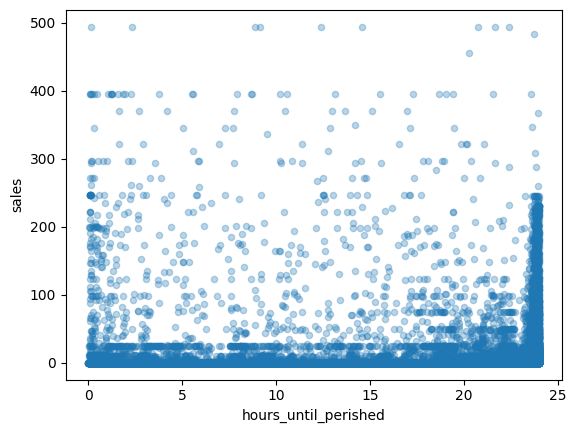

In [10]:
df.plot.scatter(x='hours_until_perished', y='sales', alpha=0.3)

<Axes: xlabel='price', ylabel='sales'>

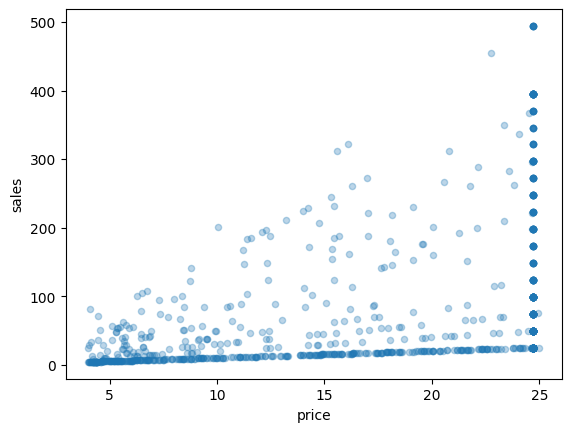

In [16]:
(
    df
    .loc[lambda df: df.sales > 0]
    .loc[lambda df: df['product'] == 'wine']
    .plot.scatter(x='price', y='sales', alpha=0.3)
)

In [5]:
from sqlalchemy import create_engine
import os 
import pandas as pd


database_url = os.environ["DATABASE_URL"]
engine = create_engine(database_url)

competitor_data_query = """
    SELECT * FROM leaderboards
"""
df = pd.read_sql_query(competitor_data_query, engine)

df.sort_values('execution_time').loc[lambda df: df.execution_time == df.execution_time.max()].values - df.sort_values('execution_time').loc[lambda df: df.execution_time == "2024-04-08 09:25:02.112911"].values

array([[44000, 572000, 638000, 0, 666000,
        Timedelta('3 days 22:20:07.665719')]], dtype=object)

In [6]:
df

,gendp,dynamicdealmakers,random_competitor,redalert,thepriceisright,execution_time
0,2060000,807000,114000,23000,11000,2024-03-29 14:57:56.302736
1,2060000,808000,114000,23000,11000,2024-03-29 14:01:33.123686
2,2219000,2230000,1326000,3126000,296000,2024-04-05 08:25:54.161748
3,2219000,2238000,1333000,3126000,302000,2024-04-05 08:59:48.296429
4,2222000,2241000,1334000,3126000,306000,2024-04-05 09:16:12.813218
...,...,...,...,...,...,...
2004,2606000,3020000,2227000,4370000,1290000,2024-04-11 09:45:02.222326
2005,2606000,3021000,2228000,4370000,1290000,2024-04-11 09:50:01.569773
2006,2606000,3021000,2229000,4370000,1290000,2024-04-11 09:55:02.638331
2007,2606000,3022000,2229000,4370000,1291000,2024-04-11 10:00:02.615231
